In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from scipy import stats
import time

# set seaborn settings
sns.set()
plt.rcParams["patch.force_edgecolor"] = True # set lines
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

## import custom helper functions
import helpers as h

In [2]:
fallDf = pd.read_csv("data/2016/fall.csv")
winterDf = pd.read_csv("data/2016/winter.csv")
springDf = pd.read_csv("data/2016/spring.csv")
summerDf = pd.read_csv("data/2016/summer.csv")

In [3]:
# i don't wanna work on the entire dataset. 
# taking a fraction only.

fallFrac = fallDf.sample(frac = 0.01)
winterFrac = winterDf.sample(frac = 0.01)
springFrac = springDf.sample(frac = 0.01)
summerFrac = summerDf.sample(frac = 0.01)

In [4]:
fall = h.convertDataType(fallFrac)
winter = h.convertDataType(winterFrac)
spring = h.convertDataType(springFrac)
summer = h.convertDataType(summerFrac)

In [5]:
all = pd.DataFrame()
all = pd.concat([fall, winter, spring, summer])
print(len(all))

198783


Now I have sampled version of each seasons. I'd like to look through the earnings of each company throughout each season to see who earns more. For the sake of simplicity, I'll just look at the "trip_total" column for comparison. 

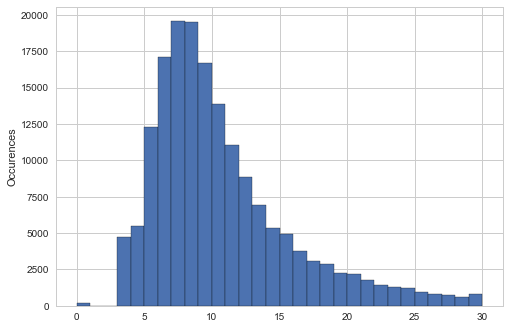

In [6]:
h.buildHistogram(all["trip_total"])

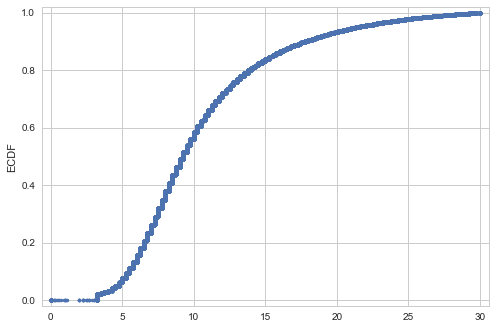

In [7]:
h.buildECDF(all["trip_total"])

In [23]:
all["trip_total"].describe()

count    198783.000000
mean         16.677611
std          37.121610
min           0.000000
25%           7.500000
50%          10.050000
75%          16.500000
max        7751.600000
Name: trip_total, dtype: float64

## Comparing seasonal earnings

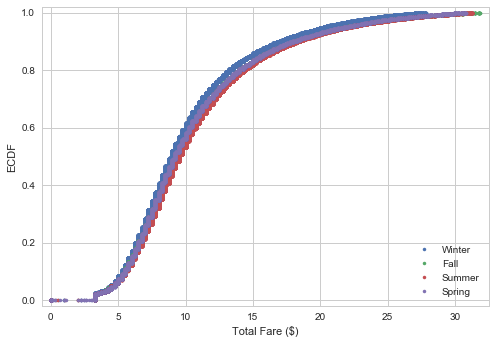

In [9]:
# Generate CDFs
x_winter, y_winter = h.getECDF(winter["trip_total"])
x_fall, y_fall = h.getECDF(fall["trip_total"])
x_summer, y_summer = h.getECDF(summer["trip_total"])
x_spring, y_spring = h.getECDF(spring["trip_total"])

# plot CDFs
_ = plt.plot(x_winter, y_winter, marker = ".", linestyle = "none")
_ = plt.plot(x_fall, y_fall, marker = ".", linestyle = "none")
_ = plt.plot(x_summer, y_summer, marker = ".", linestyle = "none")
_ = plt.plot(x_spring, y_spring, marker = ".", linestyle = "none")

# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('Winter', 'Fall', 'Summer', 'Spring'), loc='lower right')

_ = plt.xlabel("Total Fare ($)")
_ = plt.ylabel("ECDF")
plt.show()

It's bit hard to tell but Summer might yield better earnings than Winter. One possible reason is that people might be more open to going out to events during the Summer than Winter. Let's take a better look.

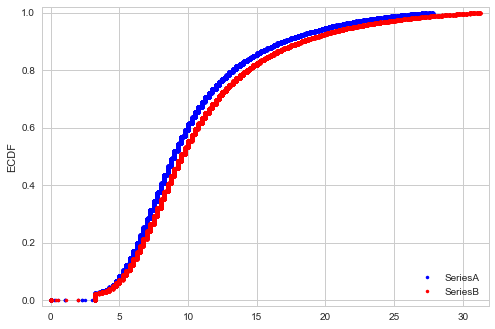

In [10]:
# compare summer and winter earnings
h.compareCDF(winter["trip_total"], summer["trip_total"])

Let's test out this hypothesis. 

* H0 = There is no difference between Summer and Winter earnings.
* H1 = There is a difference between Summer and Winter earnings. 

In [20]:
winterEarnings = np.array(winter["trip_total"])
summerEarnings = np.array(summer["trip_total"])
springEarnings = np.array(spring["trip_total"])
fallEarnings = np.array(fall["trip_total"])

Are the earnings for the 2 seasons different? If they are identical, they should have the same mean earnings so the difference in the mean earnings should be zero. We'll choose the difference in mean as our test statistic. The P-Value tells you that the percentage of chance that you would get the difference of means observed in the experiment if the earnings yields are exactly the same. 

In [17]:
h.identicalMeans(summerEarnings, winterEarnings, 10000)

Empirical Difference in Means: 1.13176991825
P-Value: 0.0


Driving in the summer yields approximately $1.20 per trip more than driving in the Winter. What about the other seasons? Is there a clear difference between Spring and Fall?

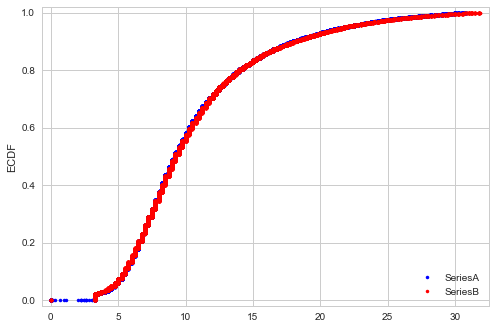

In [18]:
# compare summer and winter earnings
h.compareCDF(spring["trip_total"], fall["trip_total"])

Not really. We can also test it out to make sure. 

In [19]:
h.identicalMeans(springEarnings, fallEarnings, 10000)

Empirical Difference in Means: -0.664814105618
P-Value: 0.9916


Unable to reject the null hypothesis (No difference in distributions)

What about Fall and Summer?

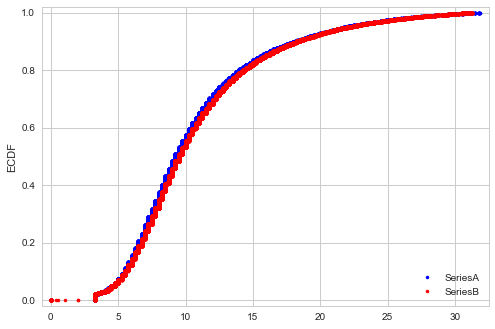

In [21]:
h.compareCDF(fall["trip_total"], summer["trip_total"])

In [22]:
h.identicalMeans(summerEarnings, fallEarnings, 10000)

Empirical Difference in Means: -0.398736007006
P-Value: 0.8843


Unable to reject the null hypothesis.

## Comparing taxi companies